In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Problème décodage caractères UTF-8, ajout du codec ISO-8859-1
df_raw_data = pd.read_csv("autos.csv", encoding='ISO-8859-1')

In [3]:
#Comprendre les data

In [4]:
df_raw_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [5]:
#Taille de la dataframe
df_raw_data.shape

(371528, 20)

In [6]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [7]:
df_raw_data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [8]:
"""
Analyse : 
outliers numériques en price, years of registration, power 
column nrOfPicture useless > all 0 
"""

'\nAnalyse : \noutliers numériques en price, years of registration, power \ncolumn nrOfPicture useless > all 0 \n'

In [9]:
#Nettoyage des Data
df_clean = df_raw_data

In [10]:
df_clean.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [11]:
#Recherche des duplicats de ligne s'il en existe
df_clean.loc[df_clean.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
242556,2016-03-28 00:56:10,Suzuki_Ignis,privat,Angebot,1000,control,kleinwagen,2002,manuell,83,andere,150000,1,benzin,suzuki,nein,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
270719,2016-04-03 09:01:15,Mercedes_Benz_CLK_320_W209,privat,Angebot,4699,test,coupe,2003,automatik,218,clk,125000,6,benzin,mercedes_benz,ja,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
341474,2016-03-18 18:46:15,Volkswagen_Passat_Variant_1.9_TDI_Highline,privat,Angebot,1999,control,kombi,2001,manuell,131,passat,150000,7,diesel,volkswagen,nein,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


In [12]:
df_clean.loc[df_clean["name"] == "Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport"]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
4713,2016-03-21 13:51:34,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1100,test,coupe,1999,manuell,193,clk,150000,3,benzin,mercedes_benz,nein,2016-03-21 00:00:00,0,52074,2016-04-06 09:46:32
92386,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
95089,2016-03-31 19:47:05,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1300,control,coupe,1998,manuell,193,clk,150000,3,benzin,mercedes_benz,nein,2016-03-31 00:00:00,0,26655,2016-04-02 15:44:56
113822,2016-03-14 02:49:09,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,2000,test,coupe,1999,manuell,247,clk,150000,5,benzin,mercedes_benz,nein,2016-03-13 00:00:00,0,70794,2016-03-30 14:17:55
132662,2016-03-07 16:56:09,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1350,control,coupe,1999,manuell,193,clk,150000,10,benzin,mercedes_benz,ja,2016-03-07 00:00:00,0,90441,2016-04-05 23:46:06
146925,2016-03-07 15:56:10,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,2900,control,coupe,1998,manuell,193,clk,150000,11,benzin,mercedes_benz,nein,2016-03-07 00:00:00,0,76744,2016-03-23 12:47:08
162895,2016-04-05 18:06:23,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,2500,control,coupe,1997,automatik,193,clk,150000,9,benzin,mercedes_benz,nein,2016-04-05 00:00:00,0,35390,2016-04-05 18:06:23
176227,2016-03-08 12:54:40,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1450,test,coupe,1999,manuell,193,clk,150000,4,benzin,mercedes_benz,ja,2016-03-08 00:00:00,0,58675,2016-04-05 16:44:43
179448,2016-03-08 18:42:48,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1799,test,coupe,1999,automatik,193,clk,20000,7,benzin,mercedes_benz,nein,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
218428,2016-03-22 11:56:27,Mercedes_Benz_CLK_Coupe_230_Kompressor_Sport,privat,Angebot,1850,control,coupe,1998,automatik,193,clk,150000,10,benzin,mercedes_benz,nein,2016-03-22 00:00:00,0,63505,2016-03-22 12:42:35


In [13]:
# Supprimer les lignes en double et mettre à jour le DataFrame
df_clean.drop_duplicates(inplace=True)

In [14]:
#Plus de duplicat restant
df_clean.loc[df_clean.duplicated()]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [15]:
#Recherche de potentiels nom similaires écrit différement
df_clean.brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada'], dtype=object)

In [16]:
#Aucune marque n'a deux noms écrit différement, après vérification rover & land rover sont bien 2 marques distinctes

In [17]:
print(df_clean.seller.unique(), df_clean.offerType.unique(), df_clean.vehicleType.unique(), df_clean.model.unique())

['privat' 'gewerblich'] ['Angebot' 'Gesuch'] [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere'] ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'andere' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'glk' '100'
 'z_reihe' 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran'
 'getz' 'a3' 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo'
 'cordoba' 'colt' 'impreza' 'vectra' 'berlingo' 'm_klasse' 'tiguan'
 'i_reihe' 'espace' 'sharan' '6_reihe' 'panda' 'up' 'seicento' 'ceed'
 '5_reihe' 'yeti' 'octavia' 'mii' 'rx_reihe' '6er' 'modus' 'fox' 'matiz'
 'beetle' 'c1' 'rio' 'touareg' 'lo

In [18]:
#Trop de modèle impossible de vérifier si deux sont identiques avec des noms différents. Les autres features ont l'air clean

In [19]:
#Visualisation de la dataframe

In [20]:
# Vérifier si des valeurs sont manquantes (NaN) dans le DataFrame df_clean
missing_values = df_clean.price.isna().unique()

# Vérifier si des valeurs sont égales à NaN dans le DataFrame df_clean (même résultat que isna())
nan_values = df_clean.price.isnull().unique()

# Afficher les résultats
print(missing_values)
print(nan_values)

[False]
[False]


In [61]:
# Tracer l'histogramme des valeurs de la colonne 'price', utilisation de head car complexité trop longue
# sns.histplot(data=df_clean.head(10000), x="price", kde=True)
# Valeurs extrèmes empechants le load de la fonction histplot, un premier filtre sur le prix a été appliqué

In [25]:
print(df_clean.price.describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8 ,0.9 , 1]))

count    3.715240e+05
mean     1.729530e+04
std      3.587973e+06
min      0.000000e+00
10%      5.000000e+02
20%      9.000000e+02
30%      1.400000e+03
40%      2.000000e+03
50%      2.950000e+03
60%      4.150000e+03
70%      5.999000e+03
80%      8.800000e+03
90%      1.400000e+04
100%     2.147484e+09
max      2.147484e+09
Name: price, dtype: float64


In [62]:
# Filtrer les lignes où la valeur de la colonne "price" est inférieur à 100,000
df_filtered = df_clean[(df_clean["price"] <= 1e+05)]

In [63]:
df_filtered 

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


<Axes: xlabel='price', ylabel='Count'>

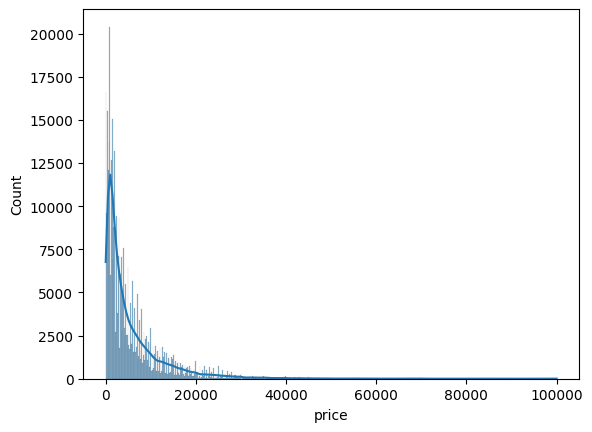

In [64]:
sns.histplot(data=df_filtered, x="price", kde=True)

<Axes: xlabel='price', ylabel='Count'>

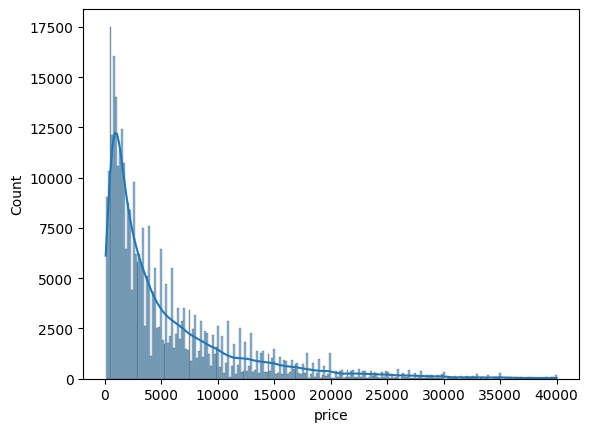

In [65]:
sns.histplot(data=df_clean[(df_clean["price"] <= 4e+04) & (df_clean["price"] >= 1e+02)], x="price", kde=True)

<Axes: xlabel='price', ylabel='Count'>

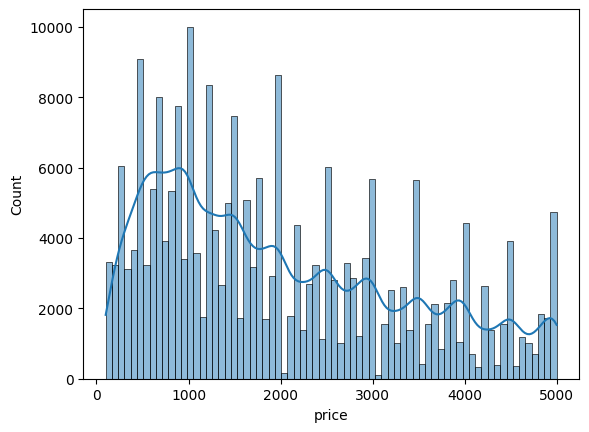

In [66]:
sns.histplot(data=df_clean[(df_clean["price"] <= 5e+03) & (df_clean["price"] >= 1e+02)], x="price", kde=True)